# Assignment 3: Dissecting Spotify Valence
> Athina Davari 8180020 \
> Department of Management Science and Technology \
> Athens University of Economics and Business

## Description
The purpose of this assignment is to dissect Spotify's Valence metric.

## Setting the Scene
For data analysis process, its necessary to import the packages we'll need.\
As a good practice, at the begining of the notebook we have a cell with all the imports. I also added ``%matplotlib inline`` to make my plot outputs appear and be stored within the notebook.

*In order to use the packages you must first install them.

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import itertools

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

from io import StringIO
from IPython.display import Image  
import pydotplus

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import random as rn
import os

import matplotlib.pyplot as plt
%matplotlib inline

## Obtain and Read the Data

In order to start the assignment, i had to find tracks and download the tracks' audio features.

Process: 
* Data was obtained from the Spotify in json format using spotipy.
* Json returned by spotipy was tranformed into a dataframe.
* The dataframe was saved as csv file.

The whole process in detail is in `Datasets.ipynb` notebook.

The data are in `data/tracks_features.csv` file and we'll be referring to it by one variable. We'll use the read_csv() function provided by Pandas.

In [2]:
data1 = pd.read_csv('data/tracks_features.csv') 
data1

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,4fouWK6XVHhzl78KzQ1UjL,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.00000,0.3670,0.4150,121.932,audio_features,4fouWK6XVHhzl78KzQ1UjL,spotify:track:4fouWK6XVHhzl78KzQ1UjL,https://api.spotify.com/v1/tracks/4fouWK6XVHhz...,https://api.spotify.com/v1/audio-analysis/4fou...,168602,4
1,3Vi5XqYrmQgOYBajMWSvCi,0.664,0.609,1,-6.509,1,0.0707,0.3040,0.00000,0.0926,0.1940,130.041,audio_features,3Vi5XqYrmQgOYBajMWSvCi,spotify:track:3Vi5XqYrmQgOYBajMWSvCi,https://api.spotify.com/v1/tracks/3Vi5XqYrmQgO...,https://api.spotify.com/v1/audio-analysis/3Vi5...,210560,4
2,4ZtFanR9U6ndgddUvNcjcG,0.563,0.664,9,-5.044,1,0.1540,0.3350,0.00000,0.0849,0.6880,166.928,audio_features,4ZtFanR9U6ndgddUvNcjcG,spotify:track:4ZtFanR9U6ndgddUvNcjcG,https://api.spotify.com/v1/tracks/4ZtFanR9U6nd...,https://api.spotify.com/v1/audio-analysis/4ZtF...,178147,4
3,6Uj1ctrBOjOas8xZXGqKk4,0.824,0.764,5,-4.175,0,0.0854,0.0888,0.00294,0.1170,0.8810,107.998,audio_features,6Uj1ctrBOjOas8xZXGqKk4,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,https://api.spotify.com/v1/audio-analysis/6Uj1...,172627,4
4,27NovPIUIRrOZoCHxABJwK,0.736,0.704,3,-7.409,0,0.0615,0.0203,0.00000,0.0501,0.8940,149.995,audio_features,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,https://api.spotify.com/v1/tracks/27NovPIUIRrO...,https://api.spotify.com/v1/audio-analysis/27No...,212000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,3Evwk0LpaDBxZw5XivAnAW,0.739,0.874,7,-3.317,0,0.2360,0.3140,0.00000,0.1050,0.7670,95.055,audio_features,3Evwk0LpaDBxZw5XivAnAW,spotify:track:3Evwk0LpaDBxZw5XivAnAW,https://api.spotify.com/v1/tracks/3Evwk0LpaDBx...,https://api.spotify.com/v1/audio-analysis/3Evw...,188211,4
17604,6lVnWrqFYadbLQQXJ3eSbq,0.692,0.767,11,-5.791,0,0.0401,0.3500,0.00000,0.0905,0.7600,139.930,audio_features,6lVnWrqFYadbLQQXJ3eSbq,spotify:track:6lVnWrqFYadbLQQXJ3eSbq,https://api.spotify.com/v1/tracks/6lVnWrqFYadb...,https://api.spotify.com/v1/audio-analysis/6lVn...,213333,4
17605,6o70OF4tqIT43azQ8gR7Y6,0.590,0.735,8,-4.621,1,0.3000,0.0901,0.76500,0.1120,0.0584,137.925,audio_features,6o70OF4tqIT43azQ8gR7Y6,spotify:track:6o70OF4tqIT43azQ8gR7Y6,https://api.spotify.com/v1/tracks/6o70OF4tqIT4...,https://api.spotify.com/v1/audio-analysis/6o70...,340870,4
17606,62QYD9QijBwm26Id8azkcR,0.547,0.685,9,-10.666,0,0.0312,0.1610,0.93300,0.9140,0.3660,130.063,audio_features,62QYD9QijBwm26Id8azkcR,spotify:track:62QYD9QijBwm26Id8azkcR,https://api.spotify.com/v1/tracks/62QYD9QijBwm...,https://api.spotify.com/v1/audio-analysis/62QY...,187227,4


Dataframe contains 17608 unique tracks.

In [3]:
data1['type'].value_counts()

audio_features    17608
Name: type, dtype: int64

Data columns:

* `song_id` : The Spotify ID for the track.
* `acousticness` :  A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* `analysis_url` : A URL to access the full audio analysis of this track. An access token is required to access this data.
* `danceability` : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* `duration_ms` : The duration of the track in milliseconds.
* `energy` : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* `id` : The Spotify ID for the track.
* `instrumentalness` : Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* `key` : The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* `liveness` : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* `loudness` : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* `mode` : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* `speechiness` : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* `tempo` : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* `time_signature` : An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
* `track_href` : A link to the Web API endpoint providing full details of the track.
* `type` : The object type.
* `uri` : The Spotify URI for the track.
* `valence` : A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

For the analysis we want all the numeric columns. The columns we will delete are:
* `song_id`
* `id`
* `uri`
* `track_href`
* `analysis_url`
* `type`

In [4]:
data1.drop(['song_id','id','uri','track_href','analysis_url','type'], axis=1, inplace=True)

In [5]:
data1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.00000,0.3670,0.4150,121.932,168602,4
1,0.664,0.609,1,-6.509,1,0.0707,0.3040,0.00000,0.0926,0.1940,130.041,210560,4
2,0.563,0.664,9,-5.044,1,0.1540,0.3350,0.00000,0.0849,0.6880,166.928,178147,4
3,0.824,0.764,5,-4.175,0,0.0854,0.0888,0.00294,0.1170,0.8810,107.998,172627,4
4,0.736,0.704,3,-7.409,0,0.0615,0.0203,0.00000,0.0501,0.8940,149.995,212000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,0.739,0.874,7,-3.317,0,0.2360,0.3140,0.00000,0.1050,0.7670,95.055,188211,4
17604,0.692,0.767,11,-5.791,0,0.0401,0.3500,0.00000,0.0905,0.7600,139.930,213333,4
17605,0.590,0.735,8,-4.621,1,0.3000,0.0901,0.76500,0.1120,0.0584,137.925,340870,4
17606,0.547,0.685,9,-10.666,0,0.0312,0.1610,0.93300,0.9140,0.3660,130.063,187227,4


## Expore which Features Influence Valence
You will use a inferential statistic method to study how features (track and possibly audio) influence valence. We want to find the best possible model for explaining the valence based on the features that we find significant.

We will run linear regressions to predict support for `valence`.

We will use a helper function `process_subset()` that takes the dependent variable, the observations, and the set of columns, fits a model, and returns the fitted model.

We will put our observation data in a matrix, `X`, to which we will add a constant column that will stand for the intercept.

In [6]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

We will use another helper function `get_best_of_k()` that will try, for every $k$, all the different combinations of $k$ independent variables out of $p$.

It will select the one with the best $R^2$.

In [7]:
def get_best_of_k(y, data, k):
    
    best_rsquared = 0
    best_model = None
    for comb in itertools.combinations(data.columns, k):
        regr = process_subset(y, data, comb)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr

    return best_model

We will use `best_subset_selection()` function that takes the data and the column of the independent variable, finds the best model with $k = 1, 2, \ldots, p$ independent variables, and returns both the best model overall and the best model for each $k$.

In [8]:
def best_subset_selection(data, exog):
    best_model = None
    best_models = []
    y = data.loc[:, exog]
    endog = [ x for x in data.columns if x != exog ]
    X = data.loc[:, endog]

    for i in range(1, len(data.columns)):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model = get_best_of_k(y, X, i)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(model.model.data.xnames[1:]) # get the variables minums the intercept
        best_models.append(model)

    print(f'Fitted {2**len(data.columns)} models')
    return best_model, best_models

In [9]:
best_model, _ = best_subset_selection(data1, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
Finding the best model for 2 variables
['danceability', 'energy']
Finding the best model for 3 variables
['danceability', 'energy', 'acousticness']
Finding the best model for 4 variables
['danceability', 'energy', 'acousticness', 'instrumentalness']
Finding the best model for 5 variables
['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness']
Finding the best model for 6 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness']
Finding the best model for 7 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'tempo']
Finding the best model for 8 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'tempo', 'duration_ms']
Finding the best model for 9 variables
['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'tempo', 'duration_ms']


The best model seen to have `12` (`13` - `intercept`) variables:
1. `danceability`
2. `energy`
3. `key`
4. `loudness` 
5. `mode`
6. `speechiness` 
7. `acousticness` 
8. `instrumentalness` 
9. `liveness` 
10. `tempo`
11. `duration_ms` 
12. `time_signature`

In [10]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     763.8
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:39:34   Log-Likelihood:                 2974.3
No. Observations:               17608   AIC:                            -5923.
Df Residuals:                   17595   BIC:                            -5821.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.3553      0.023    -15.575      0.000      -0.400      -0.311
danceability         0.6656      0.010     65.593      0.000       0.646       0.685
energy               0.5690      0.012     46.532      0.000       0.545       0.593
key                  0.0017      0.000      3.909      0.000       0.001       0.003
loudness            -0.0094      0.001    -16.688      0.000      -0.010      -0.008
mode                 0.0137      0.003      4.210      0.000       0.007       0.020
speechiness         -0.1910      0.014    -14.094      0.000      -0.218      -0.164
acousticness         0.1919      0.007     26.748      0.000       0.178       0.206
instrumentalness    -0.1550      0.007    -23.140      0.000      -0.168      -0.142
liveness            -0.0240      0.009     -2.604      0.009      -0.042      -0.006
tempo                0.0007    5.3e-05     13.577      0.000       0.001       0.001
duration_ms       -1.18e-07    1.6e-08     -7.372      0.000   -1.49e-07   -8.66e-08
time_signature      -0.0133      0.004     -3.151      0.002      -0.022      -0.005
==============================================================================
Omnibus:                      155.302   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.500
Skew:                          -0.101   Prob(JB):                     8.31e-26
Kurtosis:                       2.659   Cond. No.                     3.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Statistically significant variables
All variables are statistically significant variables (p-value<0.05):
1. `danceability`, p_value=0.000
2. `energy`, p_value=0.000
3. `key`, p_value=0.000
4. `loudness`, p_value=0.000
5. `mode`, p_value=0.000
6. `speechiness`, p_value=0.000
7. `acousticness`, p_value=0.000 
8. `instrumentalness`, p_value=0.000
9. `liveness`, p_value=0.009
9. `tempo`, p_value=0.000
10. `duration_ms`, p_value=0.000
11. `time_signature`, p_value=0.002

#### Interpreting Regression Coefficients
* One unit increase in the danceability variable while holding other predictors in the model constant increase valence variable by 0.6656.

* One unit increase in the energy variable while holding other predictors in the model constant increase valence variable by 0.5690.

* One unit increase in the key variable while holding other predictors in the model constant increase valence variable by 0.0017.

* One unit increase in the loudness variable while holding other predictors in the model constant decrease valence variable by 0.0094.

* One unit increase in the mode variable while holding other predictors in the model constant increase valence variable by 0.0137.

* One unit increase in the speechiness variable while holding other predictors in the model constant decrease valence variable by 0.1910.

* One unit increase in the acousticness variable while holding other predictors in the model constant increase valence variable by 0.1919.

* One unit increase in the instrumentalness variable while holding other predictors in the model constant decrease valence variable by 0.1885.

* One unit increase in the liveness variable while holding other predictors in the model constant decrease valence variable by 0.0240.

* One unit increase in the tempo variable while holding other predictors in the model constant increase valence variable by 0.0007.

* One unit increase in the duration_ms variable while holding other predictors in the model constant decrease valence variable by 1.18e-07.

* One unit increase in the time_signature variable while holding other predictors in the model constant decrease valence variable by 0.0133.

## Predict Valence

We will use Machine Learning techniques to predict valence based on track features:

We will use at least various different methods and neural networks:

* Decision Tree 
    * `DecisionTreeRegressor`
* Random Forest
    * `RandomForestRegressor`
    * `ExtraTreesRegressor`
* Support Vector Machines 
    * `SVR`
* Neural Networks

We will evaluate your predictions on a holdout 20% testing dataset.

For decision trees the data we will use to predict valence are:

In [11]:
feature_data = data1[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']].copy()

### Decision Tree

In order to find the best Decision Tree depth for predictions we will use GridSearchCV. Here the best depth is 7. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, data1["valence"], test_size=0.20, random_state=13)

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=7)
{'max_depth': 7}


Now we will run decision tree regressor with `max_depth=7`.

In [13]:
valence_tree = DecisionTreeRegressor(max_depth=7)

dec_tree = valence_tree.fit(X_train.values, y_train.values)

Here are the visualizations of the data.

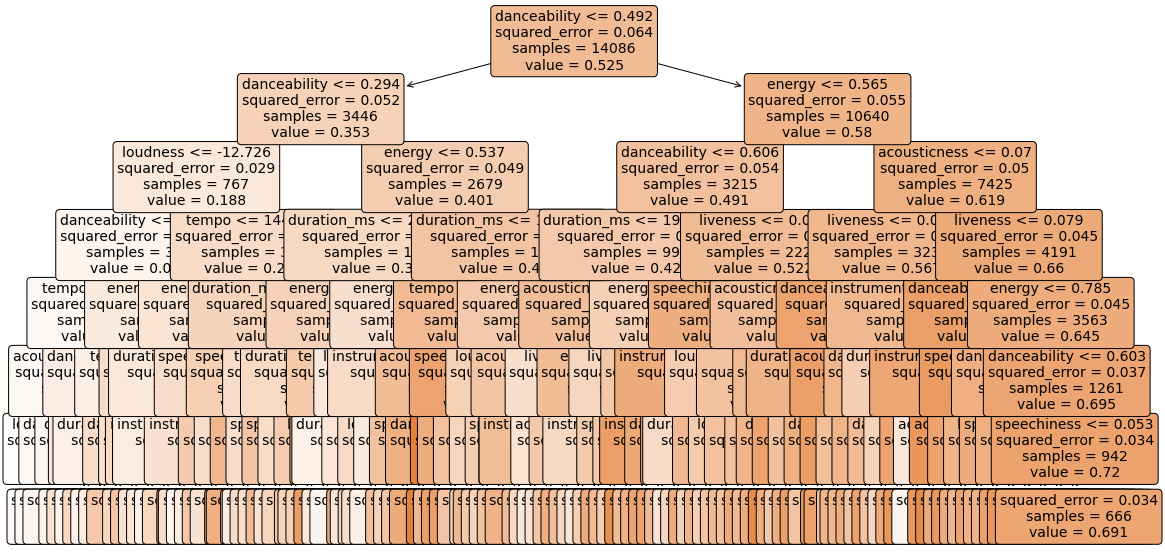

In [14]:
plt.figure(figsize=(18, 10))
_ = tree.plot_tree(valence_tree, 
                   feature_names=X_train.columns,
                   filled=True, rounded=True, fontsize=14)

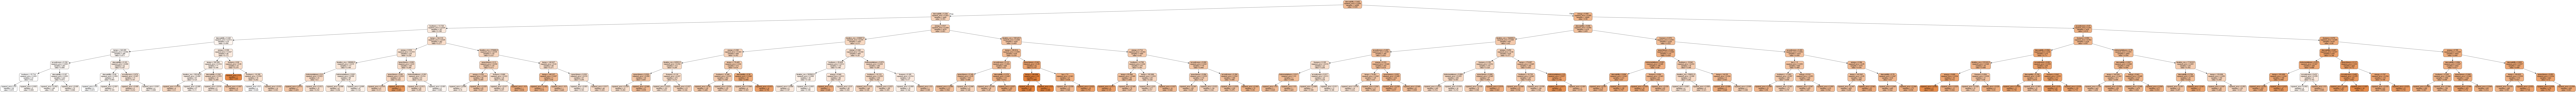

In [15]:
dot_data = StringIO()  
tree.export_graphviz(dec_tree, out_file=dot_data,  
                     feature_names=feature_data.columns,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
img = Image(graph.create_png())  
img

In [16]:
feature_names = list(X_train.columns)
print(tree.export_text(valence_tree, feature_names=feature_names))

|--- danceability <= 0.49
|   |--- danceability <= 0.29
|   |   |--- loudness <= -12.73
|   |   |   |--- danceability <= 0.24
|   |   |   |   |--- tempo <= 149.26
|   |   |   |   |   |--- acousticness <= 0.34
|   |   |   |   |   |   |--- loudness <= -15.71
|   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |--- loudness >  -15.71
|   |   |   |   |   |   |   |--- value: [0.06]
|   |   |   |   |   |--- acousticness >  0.34
|   |   |   |   |   |   |--- danceability <= 0.19
|   |   |   |   |   |   |   |--- value: [0.06]
|   |   |   |   |   |   |--- danceability >  0.19
|   |   |   |   |   |   |   |--- value: [0.10]
|   |   |   |   |--- tempo >  149.26
|   |   |   |   |   |--- danceability <= 0.16
|   |   |   |   |   |   |--- danceability <= 0.08
|   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |--- danceability >  0.08
|   |   |   |   |   |   |   |--- value: [0.10]
|   |   |   |   |   |--- danceability >  0.16
|   |   |   |   |   |   |--- acousticn

In [17]:
valence_tree.score(X_test.values, y_test.values)

0.33303209321039673

With desision tree's score (`R-squared`) = 0.33303209321039673 we can say that it is a weak-low effect model, but it is something we expected because R-square was low in linear regression when we run the models.

In [18]:
scores = cross_val_score(valence_tree, X_test.values, y_test.values, cv=10)
mean_score = np.mean(scores)
mean_score

0.23825588163729808

In [19]:
predicted = valence_tree.predict(X_test.values)
mean_absolute_error(predicted, y_test.values)

0.16535436334177744

The mean absolute error of the model is `0.16535436334177744`.

### Random Forest Regression

#### RandomForestRegressor
We will run RandomForestRegressor regression.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, data1["valence"], test_size=0.20, random_state=13)

regr = RandomForestRegressor(max_depth=None, random_state=3)
regr.fit(X_train, y_train)


RandomForestRegressor(random_state=3)

In [21]:
regr.score(X_test, y_test)

0.4939004249401896

With desision tree's score (`R-squared`) = 0.4939004249401896 we can say that it is a weak-low effect model.

In [22]:
scores = cross_val_score(regr, X_test, y_test, cv=5)
scores.mean() 

0.40267473755452887

In [23]:
predicted = regr.predict(X_test)
mean_absolute_error(predicted, y_test)

0.13945483268502745

The mean absolute error of the model is `0.13945483268502745`.

We can see an overall summary of the importance of each predictor in the model using the Residual Sum of Squares.

In [24]:
importances = regr.feature_importances_

std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_data.columns[indices[f]], importances[indices[f]]))

1. feature 0 danceability (0.266477)
2. feature 1 energy (0.148847)
3. feature 6 acousticness (0.091722)
4. feature 5 speechiness (0.079586)
5. feature 10 duration_ms (0.079156)
6. feature 8 liveness (0.078533)
7. feature 3 loudness (0.078140)
8. feature 9 tempo (0.077723)
9. feature 7 instrumentalness (0.055559)
10. feature 2 key (0.032218)
11. feature 4 mode (0.007527)
12. feature 11 time_signature (0.004513)


#### ExtraTreesRegressor
We will run ExtraTreesRegressor regression.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, data1["valence"], test_size=0.20, random_state=13)

extremely_rg = ExtraTreesRegressor(n_estimators=50, 
                                     max_depth=None,
                                     min_samples_split=3, random_state=14)
extremely_rg.fit(X_train, y_train)

ExtraTreesRegressor(min_samples_split=3, n_estimators=50, random_state=14)

In [26]:
extremely_rg.score(X_test, y_test)

0.4941142935775541

With desision tree's score (`R-squared`) = 0.4941142935775541 we can say that it is a weak-low effect model.

In [27]:
scores = cross_val_score(extremely_rg, X_test, y_test, cv=5)
scores.mean()    

0.3967984930733492

In [28]:
predicted = extremely_rg.predict(X_test)
mean_absolute_error(predicted, y_test)

0.13629463767461672

The mean absolute error of the model is `0.13629463767461672`.

We can see an overall summary of the importance of each predictor in the model using the Residual Sum of Squares.

In [29]:
importances = extremely_rg.feature_importances_

std = np.std([tree.feature_importances_ for tree in extremely_rg.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_data.columns[indices[f]], importances[indices[f]]))

1. feature 0 danceability (0.238026)
2. feature 1 energy (0.157848)
3. feature 6 acousticness (0.084510)
4. feature 7 instrumentalness (0.077506)
5. feature 3 loudness (0.074521)
6. feature 9 tempo (0.071607)
7. feature 10 duration_ms (0.070368)
8. feature 5 speechiness (0.068694)
9. feature 8 liveness (0.060402)
10. feature 2 key (0.053716)
11. feature 4 mode (0.026305)
12. feature 11 time_signature (0.016499)


### Support Vector Machines

We will scale the training dataset and run SVR.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, data1["valence"], test_size=0.20, random_state=13)

regr_svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [31]:
regr_svr.score(X_test, y_test)

0.42024197061177904

With desision tree's score (`R-square`) = 0.42024197061177904 we can say that a weak or low effect model.

In [32]:
scores = cross_val_score(regr_svr, X_test, y_test, cv=5)
scores.mean()    

0.34997170699659963

In [33]:
predicted = regr_svr.predict(X_test)
mean_absolute_error(predicted, y_test)

0.1554080935504687

The mean absolute error of the model is `0.1554080935504687`.

### Neural network

We will split the dataset into training and testing. 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(feature_data, data1["valence"], test_size=0.20, random_state=13)

We will use TensorFlow's `Normalization()` layer to normalize our data.

In [35]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
with np.printoptions(precision=2):
    print(normalizer.mean)
    print(normalizer.variance)
    print(normalizer.count)

tf.Tensor(
[[ 6.07e-01  6.35e-01  5.30e+00 -8.19e+00  6.31e-01  1.07e-01  2.85e-01
   1.12e-01  1.99e-01  1.21e+02  2.25e+05  3.92e+00]], shape=(1, 12), dtype=float32)
tf.Tensor(
[[3.06e-02 5.29e-02 1.29e+01 2.32e+01 2.33e-01 1.44e-02 9.17e-02 7.19e-02
  3.01e-02 8.95e+02 8.71e+09 1.44e-01]], shape=(1, 12), dtype=float32)
<tf.Variable 'count:0' shape=() dtype=int64, numpy=14086>


Because the algorithms we will use are probabilistic, we will initialize the random number generators with specific values to ensure reproducibility.

In [36]:
np.random.seed(13)
tf.compat.v1.set_random_seed(13)
rn.seed(12345)

os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''

Now with the `build_compile_model()` function we wiil create out neural network.

* The neural network will consist of:

  1. An input layer, of size 2.
  
  2. One hidden layer, of size 111, connected to the input layer.
  
  3. One hidden layer, of size 111, connected to the first hidden layer.
  
  4. One output layer, of size one.

In [37]:
def build_compile_model():
    data_len = len(feature_data.columns)
    
    model = keras.Sequential([
        normalizer,
        layers.Dense(111, activation='relu'), 
        layers.Dense(111, activation='relu'), 
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

model = build_compile_model()

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 111)               1443      
                                                                 
 dense_1 (Dense)             (None, 111)               12432     
                                                                 
 dense_2 (Dense)             (None, 1)                 112       
                                                                 
Total params: 14,012
Trainable params: 13,987
Non-trainable params: 25
_________________________________________________________________


Having done that, we are ready to train, i.e., fit the model.

We pass to `fit()` the data and the expected valences.

In [39]:
np.random.seed(13)
tf.compat.v1.set_random_seed(13)
rn.seed(123)

os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''

num_epochs = 18 

history = model.fit(
    X_train, y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/18
353/353 [==============================] - 1s 2ms/step - loss: 0.1813 - val_loss: 0.1681
Epoch 2/18
353/353 [==============================] - 1s 1ms/step - loss: 0.1631 - val_loss: 0.1649
Epoch 3/18
353/353 [==============================] - 0s 1ms/step - loss: 0.1579 - val_loss: 0.1684
Epoch 4/18
353/353 [==============================] - 0s 1ms/step - loss: 0.1550 - val_loss: 0.1602
Epoch 5/18
353/353 [==============================] - 0s 1ms/step - loss: 0.1526 - val_loss: 0.1624
Epoch 6/18
353/353 [==============================] - 0s 1ms/step - loss: 0.1514 - val_loss: 0.1597
Epoch 7/18
353/353 [==============================] - 1s 2ms/step - loss: 0.1495 - val_loss: 0.1607
Epoch 8/18
353/353 [==============================] - 1s 2ms/step - loss: 0.1489 - val_loss: 0.1580
Epoch 9/18
353/353 [==============================] - 1s 2ms/step - loss: 0.1475 - val_loss: 0.1559
Epoch 10/18
353/353 [==============================] - 1s 1ms/step - loss: 0.1462 - val_loss: 0.1546

We will use the test data to gauge the performance of the model by getting the mean absolute error in that portion of the dataset:

In [40]:
model.evaluate(X_test, y_test, verbose=0)

0.15859730541706085

The mean absolute error of the model is `0.15859730541706085`.

## Best Model

It seems that the best model is ExtraTreesRegressor with minimum mean absolute error = `0.13629463767461672`.

Now we want to evaluate the model with the testing dataset `data/test_dataset.csv`, which was created on `Datasets.ipynb` based on `spotify_ids.txt`.

In [41]:
test_data = pd.read_csv('data/test_dataset.csv') 
test_data

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,7lPN2DXiMsVn7XUKtOW1CS,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
1,5QO79kh1waicV47BqGRL3g,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
2,0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
3,4MzXwWMhyBbmu6hOcLVD49,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
4,5Kskr9LcNYa0tpt5f0ZEJx,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,audio_features,5Kskr9LcNYa0tpt5f0ZEJx,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,4lUmnwRybYH7mMzf16xB0y,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,audio_features,4lUmnwRybYH7mMzf16xB0y,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1158,1fzf9Aad4y1RWrmwosAK5y,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,audio_features,1fzf9Aad4y1RWrmwosAK5y,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
1159,3E3pb3qH11iny6TFDJvsg5,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,audio_features,3E3pb3qH11iny6TFDJvsg5,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4
1160,3yTkoTuiKRGL2VAlQd7xsC,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,audio_features,3yTkoTuiKRGL2VAlQd7xsC,spotify:track:3yTkoTuiKRGL2VAlQd7xsC,https://api.spotify.com/v1/tracks/3yTkoTuiKRGL...,https://api.spotify.com/v1/audio-analysis/3yTk...,202204,4


In [42]:
test_feature_data = test_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']].copy()

In [43]:
predicted = extremely_rg.predict(test_feature_data)
mean_absolute_error(predicted, test_data["valence"])

0.12093780686746991

The mean absolute error of ExtraTreesRegressor model based on given is `0.12093780686746991`.